In [ ]:
import pandas as pd
import sklearn
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Dataset
# repository https://github.com/iresiragusa/NLP/tree/main
# https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category?select=bbc-text.csv
# scarichiamo il dataset e lo carichiamo su COLAB

root = "/content/gdrive/MyDrive/Colab Notebooks/torch/"
df = pd.read_csv(root+"data/BBC-text/bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


n sample -> 2225
categories -> {'entertainment', 'business', 'politics', 'tech', 'sport'}[5]
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


<Axes: xlabel='category'>

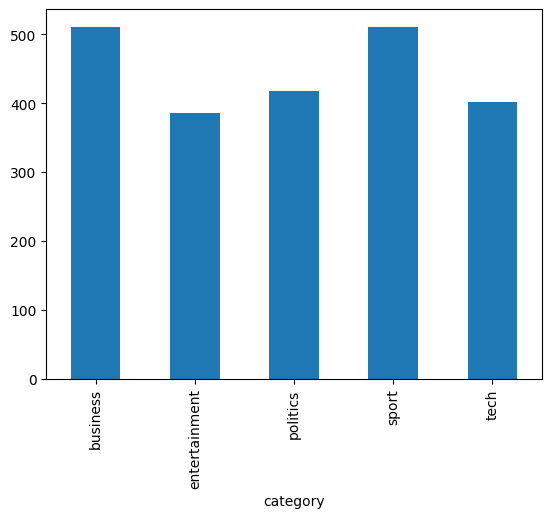

In [ ]:
# il dataset è formato da 2225 sample contenenti aricoli della BBC
# suddivisi in 5 categorie in base al loro topic

print('n sample -> '+str(len(df)))
labels = set(df['category'])
print('categories -> '+str(labels)+'['+str(len(labels))+']')
print(df['category'].value_counts())
df.groupby(['category']).size().plot.bar()

In [ ]:
print(df.at[3, 'text'])
print(df.at[3, 'category'])

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

**Tokenization**

In [ ]:
nltk.download('punkt')
#it contains data for the library (tokenizers and corpora)
s = 'The quick brown fox, jumps over: the lazy dog.'
t = nltk.word_tokenize(s)
print(t)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The', 'quick', 'brown', 'fox', ',', 'jumps', 'over', ':', 'the', 'lazy', 'dog', '.']


In [ ]:
import re
s = 'The quick brown fox, jumps over: the lazy dog.'
print(s)
s = re.sub(f'[^\w]+', ' ', s)
print(s)
t = nltk.word_tokenize(s)
print(t)

The quick brown fox, jumps over: the lazy dog.
The quick brown fox jumps over the lazy dog 
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


**Stemming**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(w) for w in t]
print(t)
print(stemmed)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


**Stopwords**

In [ ]:
nltk.download('stopwords')
# download stopwords
stop = stopwords.words('english')
print(f"There are {len(stop)} stop words \n")
print(stop)

There are 179 stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'ow

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# senza stemming
print(t)
# lower words
filtered_sentence = [w for w in t if not w.lower() in stop]
print(filtered_sentence)
# no lower words
filtered_sentence2 = [w for w in t if not w in stop]
print(filtered_sentence2)
# stemming
stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(w) for w in t] #sono in lower case
print(stemmed)
filtered_sentence3 = [w for w in stemmed if not w in stop]
print(filtered_sentence3)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']
['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


In [ ]:
# tokenization sul dataset
df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(re.sub(f'[^\w]+', ' ', x)))

# stemming sul dataset
df['stemmed'] = df['tokenized'].apply(lambda x: [stemmer.stem(w) for w in x])

# removing stopwords sul dataset
df['filtered'] = df['stemmed'].apply(lambda x: [w for w in x if not w.lower() in stop])

print(df.at[3, 'text'])
print(df.at[3, 'tokenized'])
print(df.at[3, 'stemmed'])
print(df.at[3, 'filtered'])

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

**N-grams**

In [ ]:
import nltk

index = 3
print(df.at[index, 'filtered'])

# generate bigrams/trigrams

# ngrams = list(nltk.ngrams(df.at[index, 'filtered'], 2))
ngrams = list(nltk.ngrams(df.at[index, 'filtered'], 3))
print(ngrams)

['yead', 'face', 'newcastl', 'fa', 'cup', 'premiership', 'side', 'newcastl', 'unit', 'face', 'trip', 'ryman', 'premier', 'leagu', 'leader', 'yead', 'fa', 'cup', 'third', 'round', 'game', 'arguabl', 'highlight', 'draw', 'potenti', 'money', 'spinner', 'non', 'leagu', 'yead', 'beat', 'slough', 'second', 'round', 'confer', 'side', 'exet', 'citi', 'knock', 'doncast', 'saturday', 'travel', 'old', 'trafford', 'meet', 'holder', 'manchest', 'unit', 'januari', 'arsenal', 'drawn', 'home', 'stoke', 'chelsea', 'play', 'host', 'scunthorp', 'onli', 'non', 'leagu', 'side', 'draw', 'hinckley', 'unit', 'held', 'brentford', 'goalless', 'draw', 'sunday', 'meet', 'leagu', 'one', 'leader', 'luton', 'win', 'replay', 'martin', 'allen', 'team', 'griffin', 'park', 'number', 'premiership', 'team', 'face', 'difficult', 'away', 'game', 'championship', 'side', 'weekend', '8', '9', 'januari', 'third', 'place', 'everton', 'visit', 'plymouth', 'liverpool', 'travel', 'burnley', 'crystal', 'palac', 'go', 'sunderland', '

In [ ]:
# nel dataframe i nostri input devono essere dei testi e non delle liste
df['tokenized_str'] = df['tokenized'].apply(lambda x: ' '.join(x))
df['stemmed_str'] = df['stemmed'].apply(lambda x: ' '.join(x))
df['filtered_str'] = df['filtered'].apply(lambda x: ' '.join(x))

print(df.at[3, 'tokenized_str'])
print(df.at[3, 'stemmed_str'])
print(df.at[3, 'filtered_str'])

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round the game arguably the highlight of the draw is a potential money spinner for non league yeading who beat slough in the second round conference side exeter city who knocked out doncaster on saturday will travel to old trafford to meet holders manchester united in january arsenal were drawn at home to stoke and chelsea will play host to scunthorpe the only other non league side in the draw are hinckley united who held brentford to a goalless draw on sunday they will meet league one leaders luton if they win their replay against martin allen s team at griffin park a number of premiership teams face difficult away games against championship sides on the weekend of 8 9 january third placed everton visit plymouth liverpool travel to burnley crystal palace go to sunderland fulham face carling cup semi finalists watford bolton meet ipswich while aston

In [ ]:
from sklearn.model_selection import train_test_split

(x_train, x_test, y_train, y_test) = train_test_split(
    df['filtered_str'], df['category'], test_size=0.2, random_state=17)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1780
1780
445
445


In [ ]:
# oltre ad usare NLTK, possiamo usare CountVectorizer di sklearn per generare i
# ngrams ma questo metodo implementa anche una vettorizzazione, che ci serve
# per la successiva fase di classificazione

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(2, 2))
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1780, 268654)
(1780,)
(445, 268654)
(445,)


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)

print(f"Accuracy -> {accuracy_score(y_test, preds):0.4f}")
print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

print(classification_report(y_test, preds))

Accuracy -> 0.7753
F1-score -> 0.7798
Precision -> 0.8215
Recall -> 0.7642
               precision    recall  f1-score   support

     business       0.60      0.92      0.72       107
entertainment       0.83      0.65      0.73        74
     politics       0.96      0.76      0.84        90
        sport       0.86      0.78      0.82        93
         tech       0.87      0.72      0.78        81

     accuracy                           0.78       445
    macro avg       0.82      0.76      0.78       445
 weighted avg       0.81      0.78      0.78       445



In [ ]:
# Definiamo una funzione per eseguire più classificatori al
# variare del feature set e degli n-grammi usati

def classification_procedure(df, feature, n_grams):
  (x_train, x_test, y_train, y_test) = train_test_split(
    df[feature], df['category'], test_size=0.2, random_state=17)

  vectorizer = sklearn.feature_extraction.text.CountVectorizer(
      ngram_range=(n_grams, n_grams))
  X_train = vectorizer.fit_transform(x_train)
  X_test = vectorizer.transform(x_test)

  classifier = DecisionTreeClassifier()
  classifier.fit(X_train, y_train)

  preds = classifier.predict(X_test)

  print("MODEL -> "+feature+"-"+str(n_grams))

  print(f"Accuracy -> {accuracy_score(y_test, preds):0.4f}")
  print(f"F1-score -> {f1_score(y_test, preds, average='macro'):0.4f}")
  print(f"Precision -> {precision_score(y_test, preds, average='macro'):0.4f}")
  print(f"Recall -> {recall_score(y_test, preds, average='macro'):0.4f}")

  print(classification_report(y_test, preds))
  print("-"*10)

In [ ]:
features = ['tokenized_str', 'stemmed_str', 'filtered_str']
ngrams = [2,3]

for feature in features:
  for n in ngrams:
    classification_procedure(df, feature, n)

MODEL -> tokenized_str-2
Accuracy -> 0.7169
F1-score -> 0.7140
Precision -> 0.7248
Recall -> 0.7110
               precision    recall  f1-score   support

     business       0.67      0.73      0.70       107
entertainment       0.75      0.57      0.65        74
     politics       0.79      0.72      0.76        90
        sport       0.69      0.80      0.74        93
         tech       0.72      0.74      0.73        81

     accuracy                           0.72       445
    macro avg       0.72      0.71      0.71       445
 weighted avg       0.72      0.72      0.72       445

----------
MODEL -> tokenized_str-3
Accuracy -> 0.6674
F1-score -> 0.6576
Precision -> 0.6846
Recall -> 0.6610
               precision    recall  f1-score   support

     business       0.70      0.60      0.65       107
entertainment       0.67      0.39      0.50        74
     politics       0.88      0.76      0.81        90
        sport       0.58      0.81      0.68        93
         tech  